# Telecom Customer Churn Prediction

The aim of this project is to analyze customer demographics, services, tenure and other variables to predict whether a particular customer will churn or not.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [9]:
#Loading the dataset
csv_path = Path(r'C:\Users\USUARIO\Desktop\Business-focus-data-science\database\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(csv_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing Part1

In [10]:
#Checking the shape of the dataset
df.shape

(7043, 21)

In [11]:
#Removing the customerID column
df.drop(columns='customerID', inplace=True)

In [12]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(22)

In [ ]:
#Removing the duplicate values
df.drop_duplicates(inplace=True)
#Checking the shape of the dataframe after removing duplicates
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Type casting column Total Charges.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
#Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#Droping the null values
df.dropna(inplace=True)

In [17]:
#Checking number of unique values in each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
#Checking the unique values in each column
cols = df.columns
for i in cols:
    print(i, df[i].unique(), '\n')
    

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or pattern in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

#### Customer Demographics

Text(0.5, 1.0, 'Dependents')

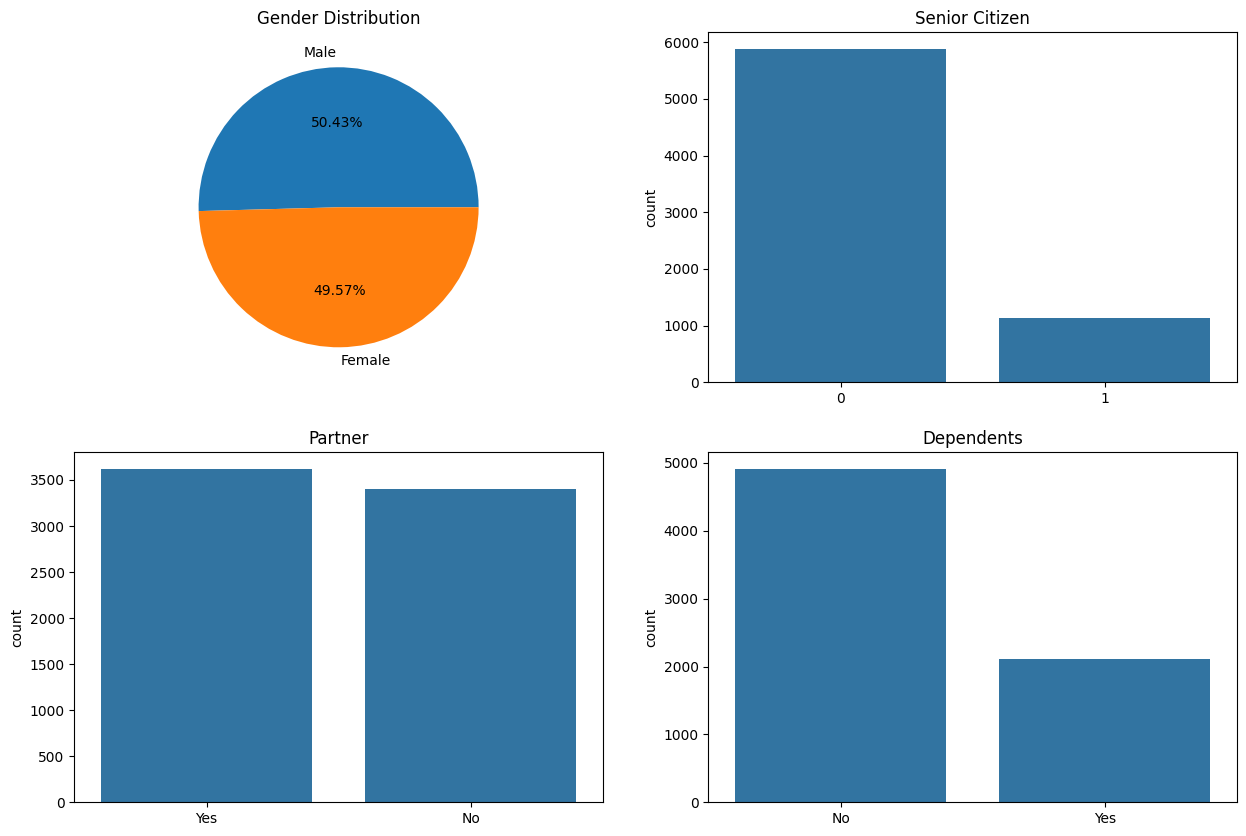

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#Gende distribution
ax[0,0].pie(df['gender'].value_counts(), labels =['Male', 'Female'], autopct = '%1.2f%%')
ax[0,0].set_title('Gender Distribution')
#Senior Citizen Distribution
sns.barplot(y= df['SeniorCitizen'].value_counts(), x= df['SeniorCitizen'].unique(), ax=ax[0,1]).set_title('Senior Citizen')
#Partner Distribution
sns.barplot(y=df['Partner'].value_counts(), x= df['Partner'].unique(), ax=ax[1,0]).set_title('Partner')
#Dependents Distribution
sns.barplot(y=df['Dependents'].value_counts(), x= df['Dependents'].unique(), ax=ax[1,1]).set_title('Dependents')

Note: These graphs shows the customer demographics. The number of males and females is almost same, with few more males than females in the dataset. Majority of them are not senior citizen. Nearly 3500, customers have a partner and similar number of cutomers don't. Majority of the customers don't have dependents, but still a significant number does have dependents.

From these graphs, we get know about the customers demographics, which help us to get an idea of their psychology based on their age, relationship status, and dependents.

### Services

Text(0.5, 1.0, 'Streaming Movies')

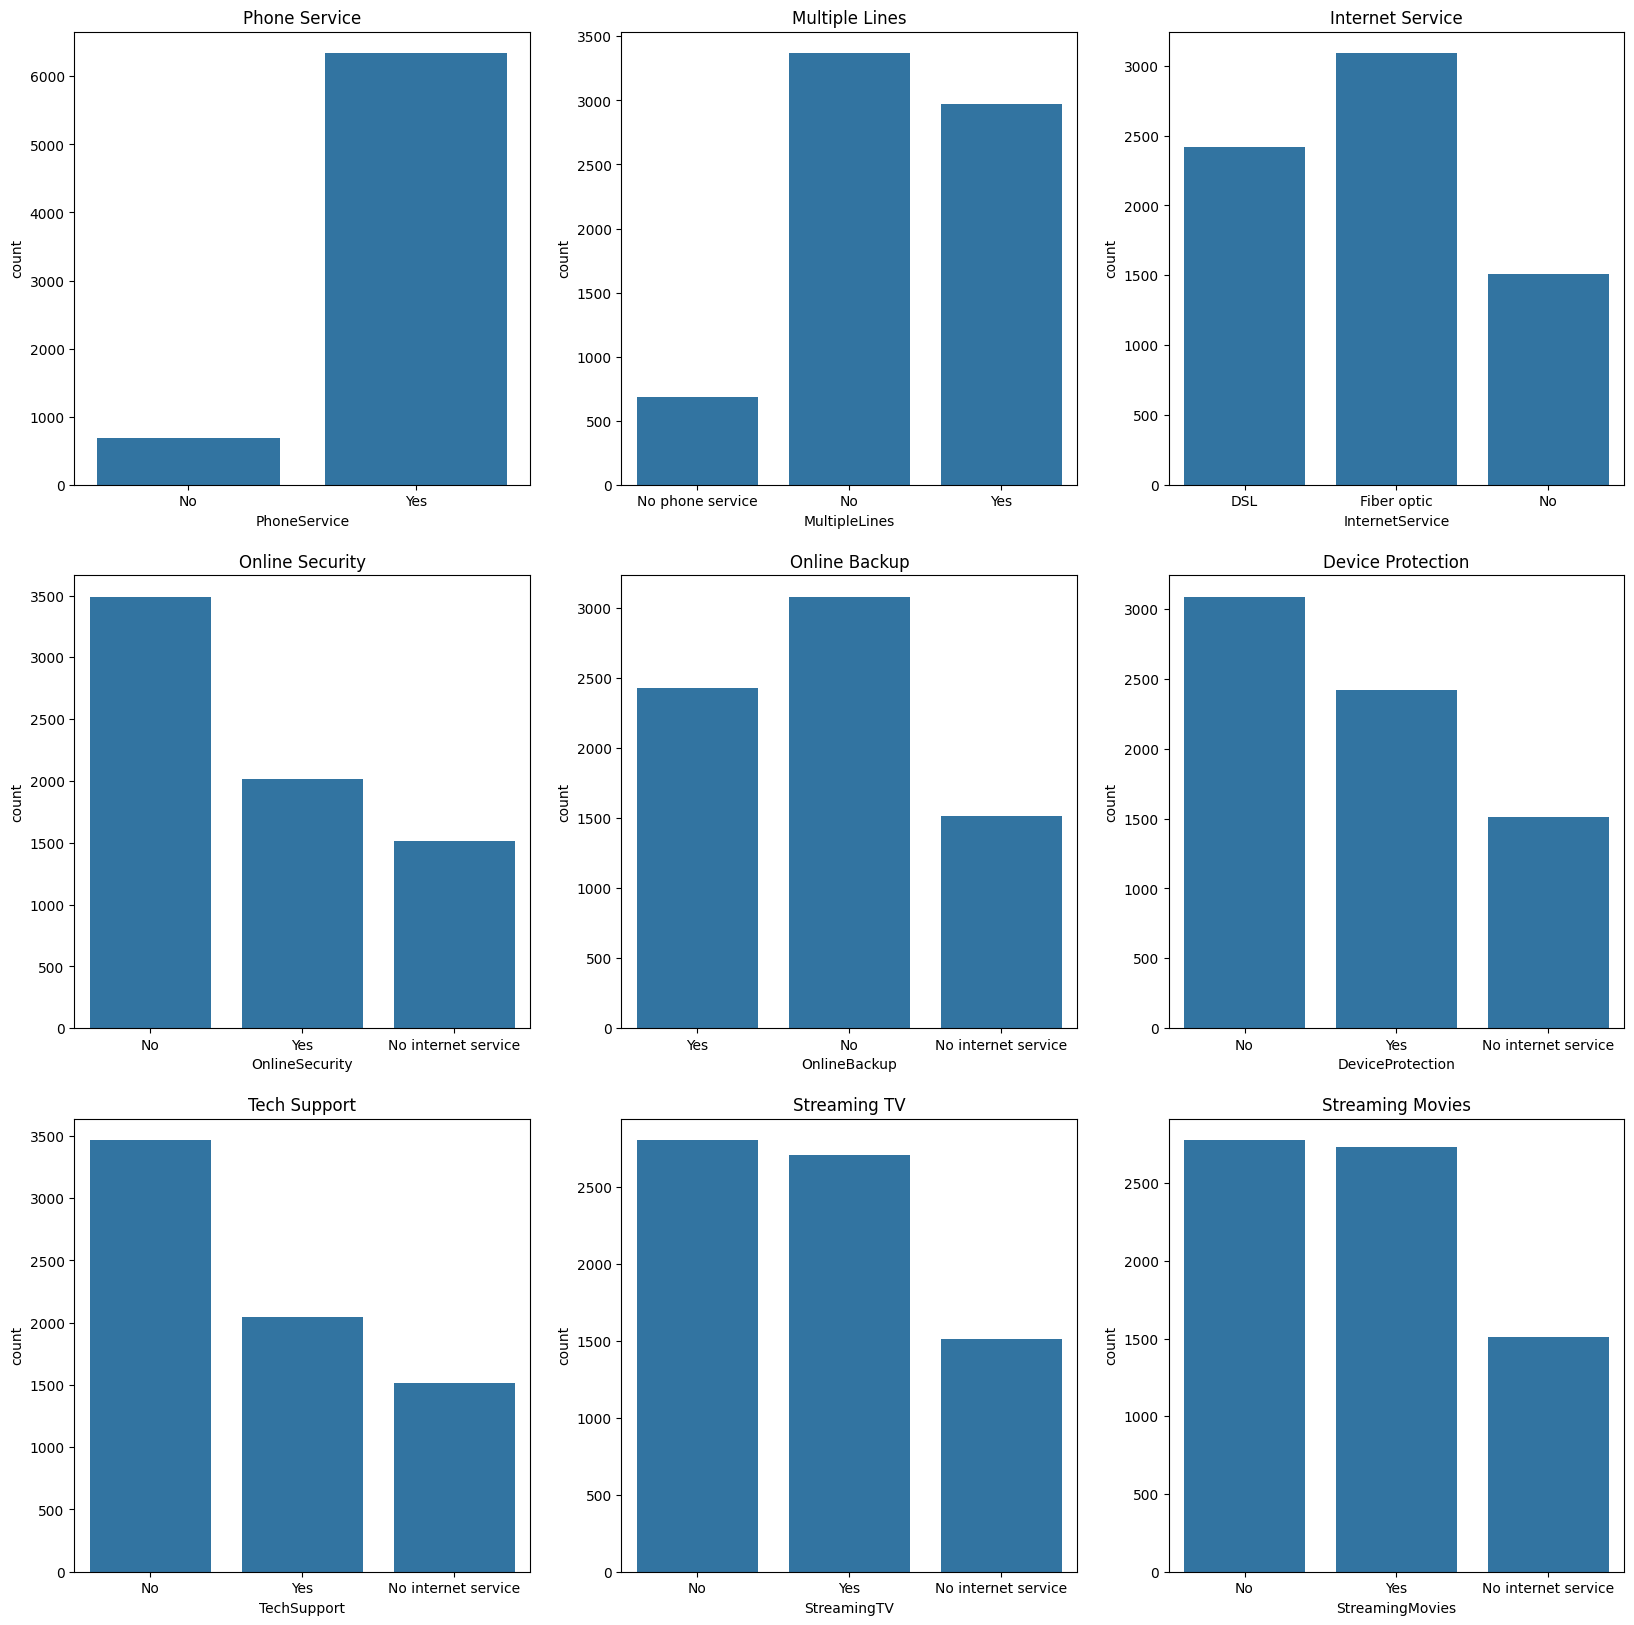

In [28]:
fig, ax = plt.subplots(3,3, figsize=(20,20))
#Phone service.
sns.countplot(x=df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines.
sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
ax[0,2].set_title('Multiple Lines')
sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security.
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup.
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection.
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support.
sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV.
sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies.
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')


The above graphs visualizes the services taken by the customers from the telecom company. Nearly 6000 customers have taken phone service. However, nealry half of the cutomers have taken multiplt lines from the company. Almost 5500, have taken internet services from the company, where 3000 customers opted fibre optcs and rest of them opted DSL which could possible for business purposes. From these three major services related to telecom, the phone services and the internet services are the most popular services among the customers.

Coming to other services which includes- Online Security, Online Backup, Device Protection, Tech Support, and Streaming Services. The online backup and device protection service is opted by almost 2500 customers, which higlights the customers concern regarding their device safety and data protection. The online security and tech support is opted by almost 2000 customers which are least opted services among the customers. The streaming services are the most popular services, with more than 2500 customers opting for it.

From this, I conclude that part from the internet and phone services, the streaming services are most opted ones. Therefore, the company should focus on providing better streaming services to the customers.

### Tenure and Contract